<a href="https://colab.research.google.com/github/beajdkjj/machine-learning/blob/main/suicide_data_predict_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import kagglehub
import pandas as pd
import kagglehub
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("kumaranand05/who-suicide-data-1950-2021")
df = pd.read_csv(path+'/combined_processed_data.csv', sep = ',')
print(df.dtypes)

Region Name                                                 object
Country Name                                                object
Year                                                         int64
Sex                                                         object
0 Year                                                     float64
1-4 Years                                                  float64
5-9 Years                                                  float64
10-14 Years                                                float64
15-19 Years                                                float64
20-24 Years                                                float64
25-29 Years                                                float64
30-34 Years                                                float64
35-39 Years                                                float64
40-44 Years                                                float64
45-49 Years                                                flo

In [16]:
#tratamento dos dados
df_mulheres = df[df['Sex'] == 'Female']
df = df[~df['Year'].isin([2019, 2020, 2021])]
df['No of Suicides'] = df['No of Suicides'].astype(int)
df['No of Suicides'] = df['No of Suicides'].fillna(0).astype(int)
df_por_ano = df_mulheres.groupby('Year')['No of Suicides'].sum().reset_index()


print(df_por_ano);

    Year  No of Suicides
0   1950           14287
1   1951           16250
2   1952           16496
3   1953           17515
4   1954           18687
..   ...             ...
64  2014           55446
65  2015           53919
66  2016           50597
67  2017           50218
68  2018           48571

[69 rows x 2 columns]


In [17]:
treino = df_por_ano[df_por_ano['Year'] <= 2010]
teste = df_por_ano[(df_por_ano['Year'] >= 2010) & (df_por_ano['Year'] <= 2015)]

print(treino)
print(teste)

    Year  No of Suicides
0   1950           14287
1   1951           16250
2   1952           16496
3   1953           17515
4   1954           18687
..   ...             ...
56  2006           53089
57  2007           55272
58  2008           54903
59  2009           56681
60  2010           55965

[61 rows x 2 columns]
    Year  No of Suicides
60  2010           55965
61  2011           56185
62  2012           54740
63  2013           53903
64  2014           55446
65  2015           53919


Tentando com Prophet

In [4]:
!pip install prophet
from prophet import Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps8iwrs6r/a68s5gg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps8iwrs6r/s7nu_w5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71663', 'data', 'file=/tmp/tmps8iwrs6r/a68s5gg3.json', 'init=/tmp/tmps8iwrs6r/s7nu_w5i.json', 'output', 'file=/tmp/tmps8iwrs6r/prophet_modelr0nr7140/prophet_model-20250505223828.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:38:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:38:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

Mean Absolute Error (Prophet): 6698.3632612002575


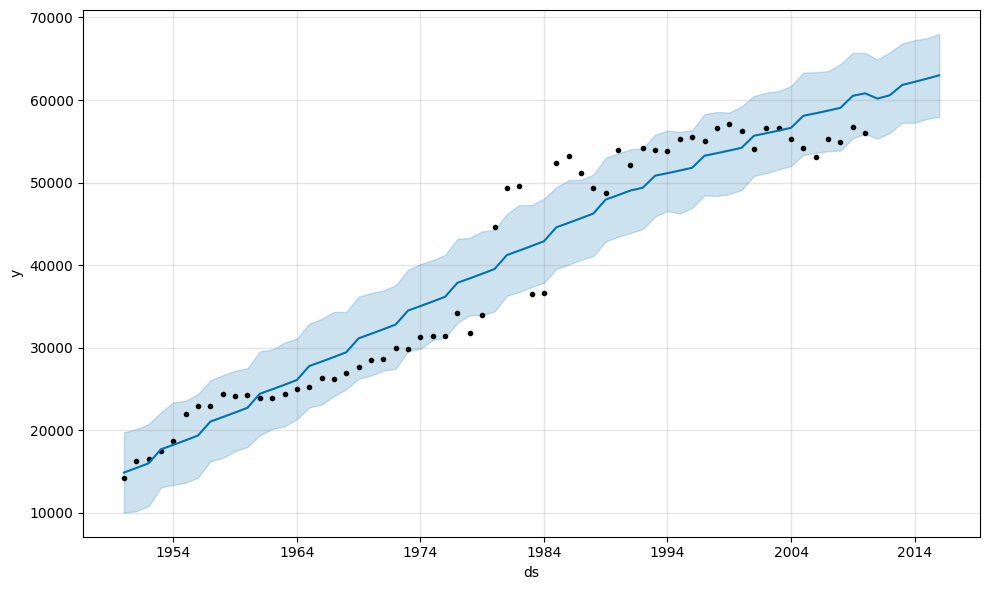

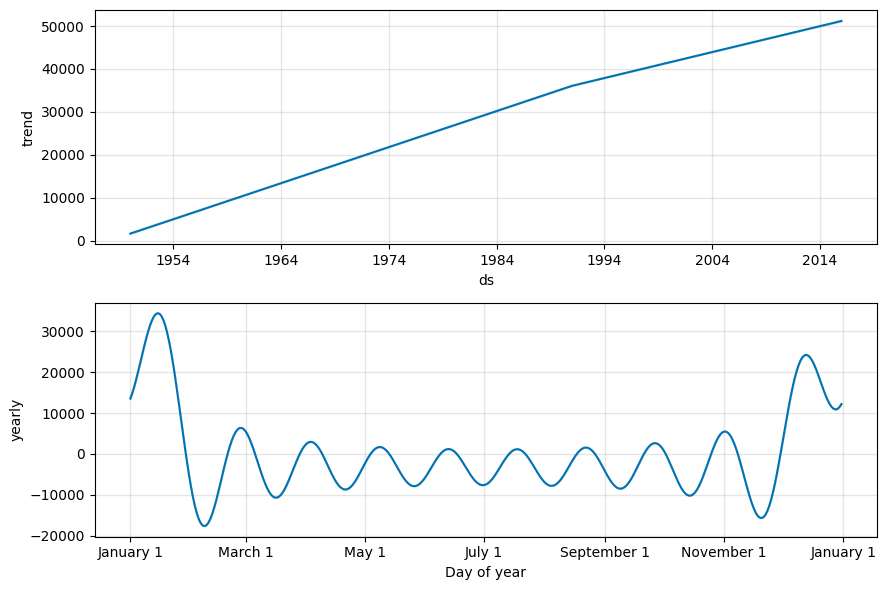

In [22]:
from prophet import Prophet
import pandas as pd

# Prepare data for Prophet
treino_prophet = treino.rename(columns={'Year': 'ds', 'No of Suicides': 'y'})
teste_prophet = teste.rename(columns={'Year': 'ds', 'No of Suicides': 'y'})
treino_prophet['ds'] = pd.to_datetime(treino_prophet['ds'], format='%Y')
teste_prophet['ds'] = pd.to_datetime(teste_prophet['ds'], format='%Y')

# Create and fit the Prophet model
modelo_prophet = Prophet()
modelo_prophet.fit(treino_prophet)

# Create future dataframe for predictions
futuro = modelo_prophet.make_future_dataframe(periods=len(teste_prophet), freq='Y')

# Make predictions
previsoes_prophet = modelo_prophet.predict(futuro)

# Plot the predictions
fig_prophet = modelo_prophet.plot(previsoes_prophet)

# Plot components
fig_comp = modelo_prophet.plot_components(previsoes_prophet)

y_pred = previsoes_prophet['yhat'][-len(teste_prophet):].values

# Evaluate the model (example: Mean Absolute Error)
from sklearn.metrics import mean_absolute_error
mae_prophet = mean_absolute_error(teste_prophet['y'], y_pred)
print(f"Mean Absolute Error (Prophet): {mae_prophet}")

plt.show()
